<a href="https://colab.research.google.com/github/olinyoder2534/NLP_practice/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [4]:
v = TfidfVectorizer()

In [5]:
output = v.fit_transform(corpus)

In [6]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [7]:
feature_names = v.get_feature_names_out()

for word in feature_names:
  index = v.vocabulary_.get(word)
  print(index,'|', word, '|', v.idf_[index])

0 | already | 2.386294361119891
1 | am | 2.386294361119891
2 | amazon | 2.386294361119891
3 | and | 2.386294361119891
4 | announcing | 1.2876820724517808
5 | apple | 2.386294361119891
6 | are | 2.386294361119891
7 | ate | 2.386294361119891
8 | biryani | 2.386294361119891
9 | dot | 2.386294361119891
10 | eating | 1.9808292530117262
11 | eco | 2.386294361119891
12 | google | 2.386294361119891
13 | grapes | 2.386294361119891
14 | iphone | 2.386294361119891
15 | ironman | 2.386294361119891
16 | is | 1.1335313926245225
17 | loki | 2.386294361119891
18 | microsoft | 2.386294361119891
19 | model | 2.386294361119891
20 | new | 1.2876820724517808
21 | pixel | 2.386294361119891
22 | pizza | 2.386294361119891
23 | surface | 2.386294361119891
24 | tesla | 2.386294361119891
25 | thor | 2.386294361119891
26 | tomorrow | 1.2876820724517808
27 | you | 2.386294361119891


In [8]:
df = pd.read_csv('/content/Ecommerce_data.csv')

In [9]:
df.shape

(24000, 2)

In [10]:
df.dtypes

Text     object
label    object
dtype: object

In [11]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [12]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [13]:
df.isnull().values.any()

False

In [14]:
df['label_num'] = df['label'].map({
    'Household' : 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=42,
    stratify=df.label_num
)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [17]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1200
           1       0.98      0.93      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('RF', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.97      0.98      0.98      1200
           2       0.98      0.96      0.97      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [20]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size=0.2,
    random_state=42,
    stratify=df.label_num
)

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('RF', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.99      0.97      0.98      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Truth')

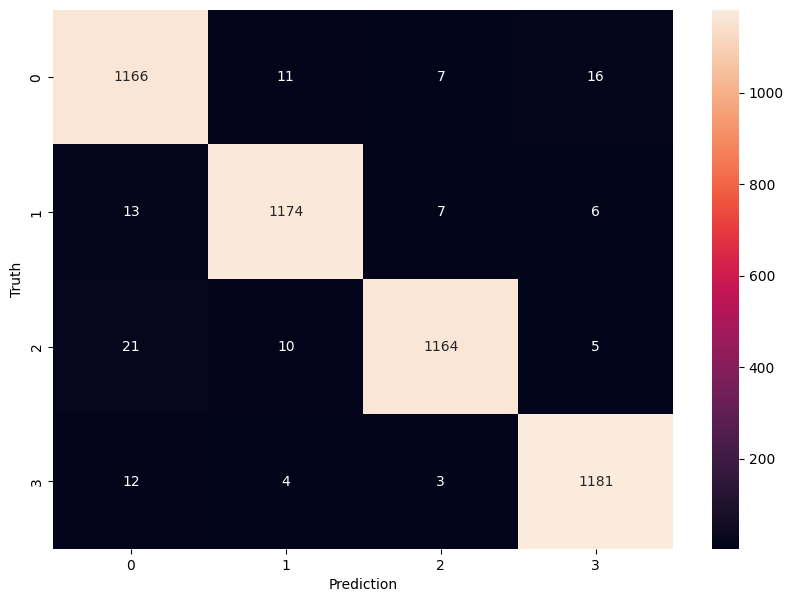

In [24]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')